In [1]:
import os
print(os.getcwd())


C:\Users\yashj


In [2]:
import shutil

source_path = r"C:\Users\yashj\Downloads\Download Data - STOCK_US_XNAS_AAPL.csv"
destination_path = r"C:\Users\yashj\aapl.csv"

# Copy and rename the file
shutil.copy(source_path, destination_path)

print(f"File copied and saved as {destination_path}")


File copied and saved as C:\Users\yashj\aapl.csv


In [3]:
import pandas as pd
df = pd.read_csv("aapl.csv")
print(df.head())


         Date    Open    High     Low   Close       Volume
0  08-11-2023  177.32  178.62  176.55  177.79  5,20,36,672
1  08-10-2023  179.48  180.75  177.60  177.97  5,46,86,848
2  08-09-2023  180.87  180.93  177.01  178.19  6,03,78,488
3  08-08-2023  179.69  180.27  177.58  179.80  6,78,23,000
4  08-07-2023  182.13  183.13  177.35  178.85  9,75,76,070


In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
# Step 2: Load the dataset
df = pd.read_csv("aapl.csv")

In [13]:
# Step 3: Inspect the first few rows to understand column names
print("Columns in the dataset:", df.columns)
print(df.head())


Columns in the dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
         Date    Open    High     Low   Close       Volume
0  08-11-2023  177.32  178.62  176.55  177.79  5,20,36,672
1  08-10-2023  179.48  180.75  177.60  177.97  5,46,86,848
2  08-09-2023  180.87  180.93  177.01  178.19  6,03,78,488
3  08-08-2023  179.69  180.27  177.58  179.80  6,78,23,000
4  08-07-2023  182.13  183.13  177.35  178.85  9,75,76,070


In [16]:
# Step 4: (Optional) Rename columns if needed — update these if your column names differ
df.rename(columns={
    "Date": "date",
    "Open": "Open",
    "High": "High",
    "Low": "Low",
    "Close": "Close",
    "Volume": "Volume"
}, inplace=True)

In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df[df['date'].isna()])  # Check any parsing failures
df = df.dropna(subset=['date'])  # Remove rows where date couldn't be parsed




    date    Open    High     Low   Close       Volume
9    NaT  196.06  196.49  195.26  196.45  3,88,24,113
10   NaT  194.67  196.63  194.14  195.83  4,82,91,441
11   NaT  196.02  197.20  192.55  193.22  4,74,60,180
12   NaT  193.67  195.64  193.32  194.50  4,74,71,871
13   NaT  193.33  194.44  192.92  193.62  3,72,83,199
..   ...     ...     ...     ...     ...          ...
245  NaT  173.03  173.74  171.31  171.52  7,03,46,305
246  NaT  173.75  174.90  173.12  174.15  6,22,90,078
247  NaT  172.77  176.15  172.57  174.55  7,95,42,039
248  NaT  172.78  173.71  171.66  173.03  5,63,77,047
249  NaT  171.52  173.39  171.35  173.19  5,40,91,688

[153 rows x 6 columns]


In [19]:
print(df['date'].head(10))


0    2023-08-11
1    2023-08-10
2    2023-08-09
3    2023-08-08
4    2023-08-07
5    2023-08-04
6    2023-08-03
7    2023-08-02
8    2023-08-01
22   2023-07-12
Name: date, dtype: datetime64[ns]


In [20]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)


In [21]:
# Sort by date ascending
df.sort_values('date', inplace=True)

In [22]:
# Create prediction column (shift Close by -30 for 30 days ahead)
df['Prediction'] = df['Close'].shift(-30)


In [23]:
# Prepare features and labels
X = np.array(df[['Close']])[:-30]
y = np.array(df['Prediction'])[:-30]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Train linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Check accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Model Accuracy: -27.50%


In [25]:
# Predict next 30 days
X_future = np.array(df[['Close']].tail(30))
forecast = model.predict(X_future)

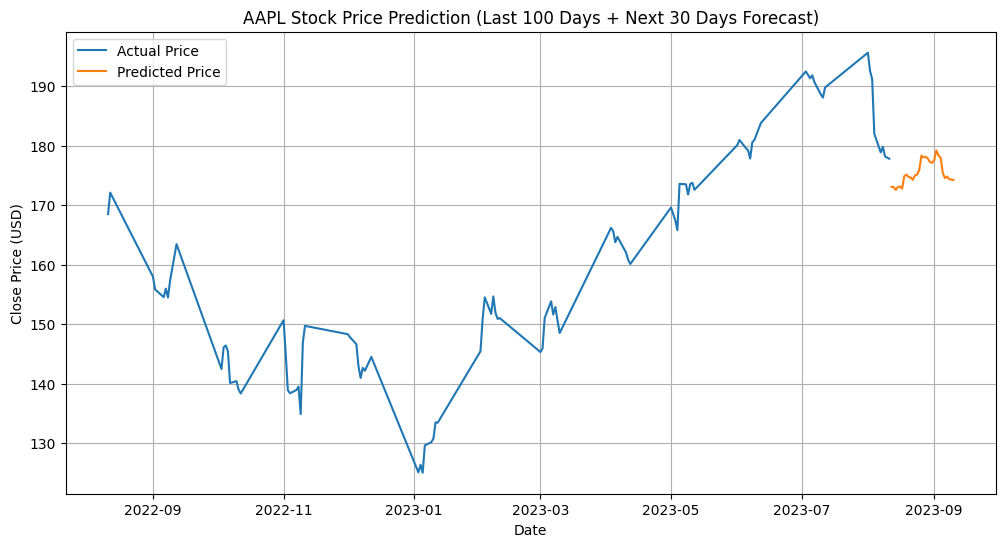

In [26]:
# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("AAPL Stock Price Prediction (Last 100 Days + Next 30 Days Forecast)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.plot(df['date'].tail(100), df['Close'].tail(100), label='Actual Price')
future_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(future_dates, forecast, label='Predicted Price')
plt.legend()
plt.grid(True)
plt.show()